<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Documentation-on-Classification-in-Machine-Learning/blob/main/Classification%20in%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Code Structure**

1. Data Exploration and Visualization
    
    1.1. Loading the Dataset

    1.2. Data Cleaning

    1.3. Exploratory Data Analysis (EDA)

    1.4. Visualizations



2. Feature Engineering and Preprocessing

    2.1. Feature and Target Extraction

    2.2. Label Encoding

    2.3. Data Splitting

    2.4. Standardization



3. Model Training

    3.1. Logistic Regression:

    3.2. K-Nearest Neighbors (KNN):

    3.3. Support Vector Machine (SVM):

    3.4. Gaussian Naive Bayes:

    3.5. Bernoulli Naive Bayes:

    3.6. Decision Tree:

    3.7. Random Forest:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB,MultinomialNB ,BernoulliNB,ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import plot_tree


In [3]:
import statsmodels.api as sm

In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.plotting import andrews_curves,parallel_coordinates,radviz

In [5]:
iris = load_iris()
data_01 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data_01['Species'] = iris.target_names[iris.target]

In [6]:
data_01.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
60,5.0,2.0,3.5,1.0,versicolor
86,6.7,3.1,4.7,1.5,versicolor
110,6.5,3.2,5.1,2.0,virginica
126,6.2,2.8,4.8,1.8,virginica
39,5.1,3.4,1.5,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa
129,7.2,3.0,5.8,1.6,virginica
18,5.7,3.8,1.7,0.3,setosa
85,6.0,3.4,4.5,1.6,versicolor
118,7.7,2.6,6.9,2.3,virginica


In [7]:
data_01.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [8]:
data_01.rename(columns={'sepal length (cm)':'SepalLengthCm', 'sepal width (cm)':'SepalWidthCm', 'petal length (cm)':'PetalLengthCm', 'petal width (cm)':'PetalWidthCm'}, inplace=True)

In [9]:
data_01.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
Species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
data_01["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
numeric_columns = data_01.select_dtypes(include=[np.number]).columns
correlation_matrix = data_01[numeric_columns].corr()

fig = px.imshow(correlation_matrix.values,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Blackbody',
                labels=dict(color='Correlation'))

annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(dict(x=correlation_matrix.columns[i], y=correlation_matrix.columns[j],
                                text=str(round(value, 2)),
                                font=dict(color='white' if abs(value) > 0.5 else 'black'),
                                showarrow=False))
fig.update_layout(annotations=annotations)

fig.update_layout(
    title='Correlation Heatmap of Features',
    xaxis_title='Features',
    yaxis_title='Features',
    width=700,
    height=600,
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_coloraxes(colorbar=dict(
    title='Correlation',
    tickvals=[-1, 0, 1],
    ticktext=['Negative', 'Neutral', 'Positive'],
    ticks='outside'
))

fig.show()


In [13]:
fig = px.scatter(data_01, x = "SepalLengthCm", y = "SepalWidthCm", color = "Species",
                 title='Sepal Length vs Sepal Width by Species',
                 labels={"SepalLengthCm": 'Sepal Length (cm)', "SepalWidthCm": 'Sepal Width (cm)'},
                 hover_data=['Species'])

fig.show()

In [14]:
fig = px.scatter(data_01, x = "PetalLengthCm", y = "PetalWidthCm", color = "Species",
                 title='Petal Length vs Petal Width by Species',
                 labels={"PetalLengthCm": 'Petal Length (cm)', "PetalWidthCm": 'Petal Width (cm)'},
                 hover_data=['Species'])

fig.show()

In [15]:
fig = px.box(data_01, x='Species', y='PetalWidthCm', color='Species',
             title='Petal Width Distribution by Species',
             labels={'Species': 'Species', 'PetalWidthCm': 'Petal Width (cm)'},
             points='all')

fig2 = px.box(data_01, x='Species', y='PetalLengthCm', color='Species',
              title='Petal Length Distribution by Species',
              labels={'Species': 'Species', 'PetalLengthCm': 'Petal Length (cm)'},
              points='all')

fig3 = px.box(data_01, x='Species', y='SepalWidthCm', color='Species',
              title='Sepal Width Distribution by Species',
              labels={'Species': 'Species', 'SepalWidthCm': 'Sepal Width (cm)'},
              points='all')

fig4 = px.box(data_01, x='Species', y='SepalLengthCm', color='Species',
              title='Sepal Length Distribution by Species',
              labels={'Species': 'Species', 'SepalLengthCm': 'Sepal Length (cm)'},
              points='all')

In [16]:
fig_combined = make_subplots(rows=2, cols=2,
                             subplot_titles=['Petal Width Distribution',
                                              'Petal Length Distribution',
                                              'Sepal Width Distribution',
                                              'Sepal Length Distribution'])

for fig_obj, row, col in zip([fig, fig2, fig3, fig4], [1, 1, 2, 2], [1, 2, 1, 2]):
    for trace in fig_obj.data:
        fig_combined.add_trace(trace, row=row, col=col)


fig_combined.update_layout(title='Distribution of Iris Features by Species',
                           height=800, width=1000)

fig_combined.show()

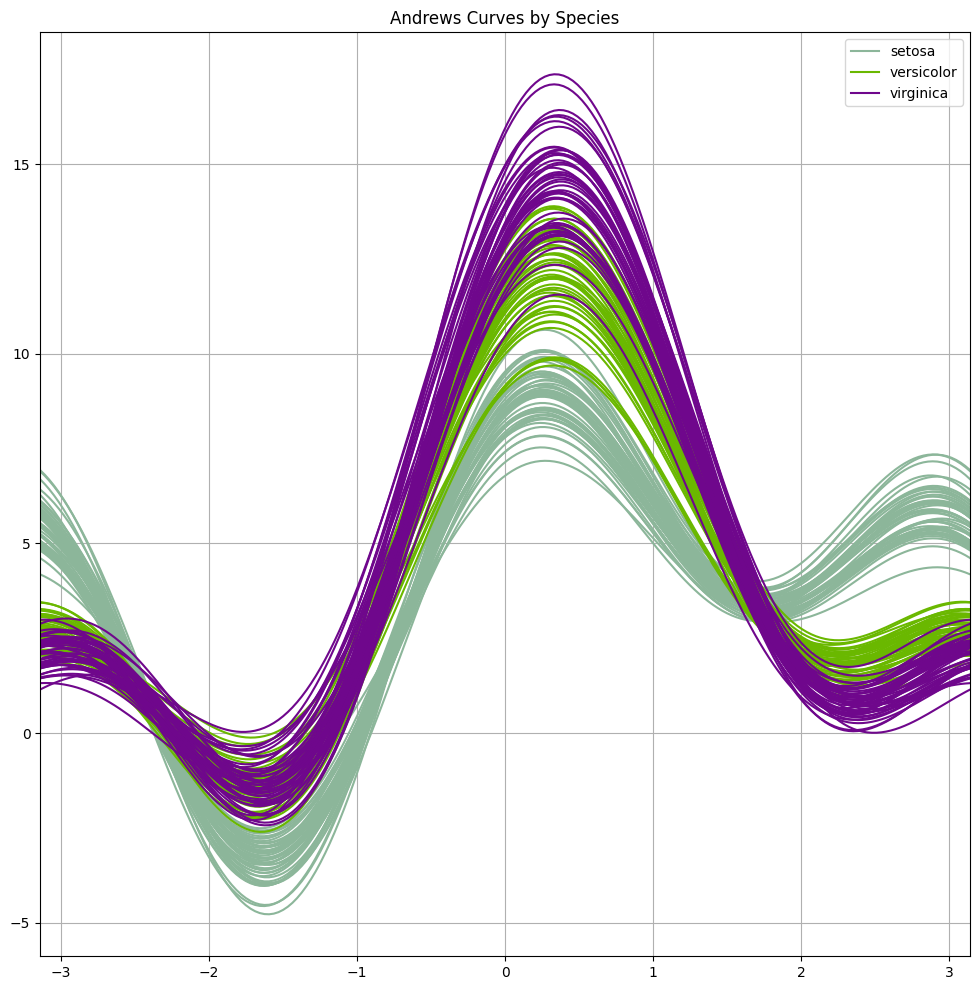

In [17]:
plt.figure(figsize=(12, 12))
andrews_curves(data_01, "Species")
plt.title('Andrews Curves by Species')
plt.show()

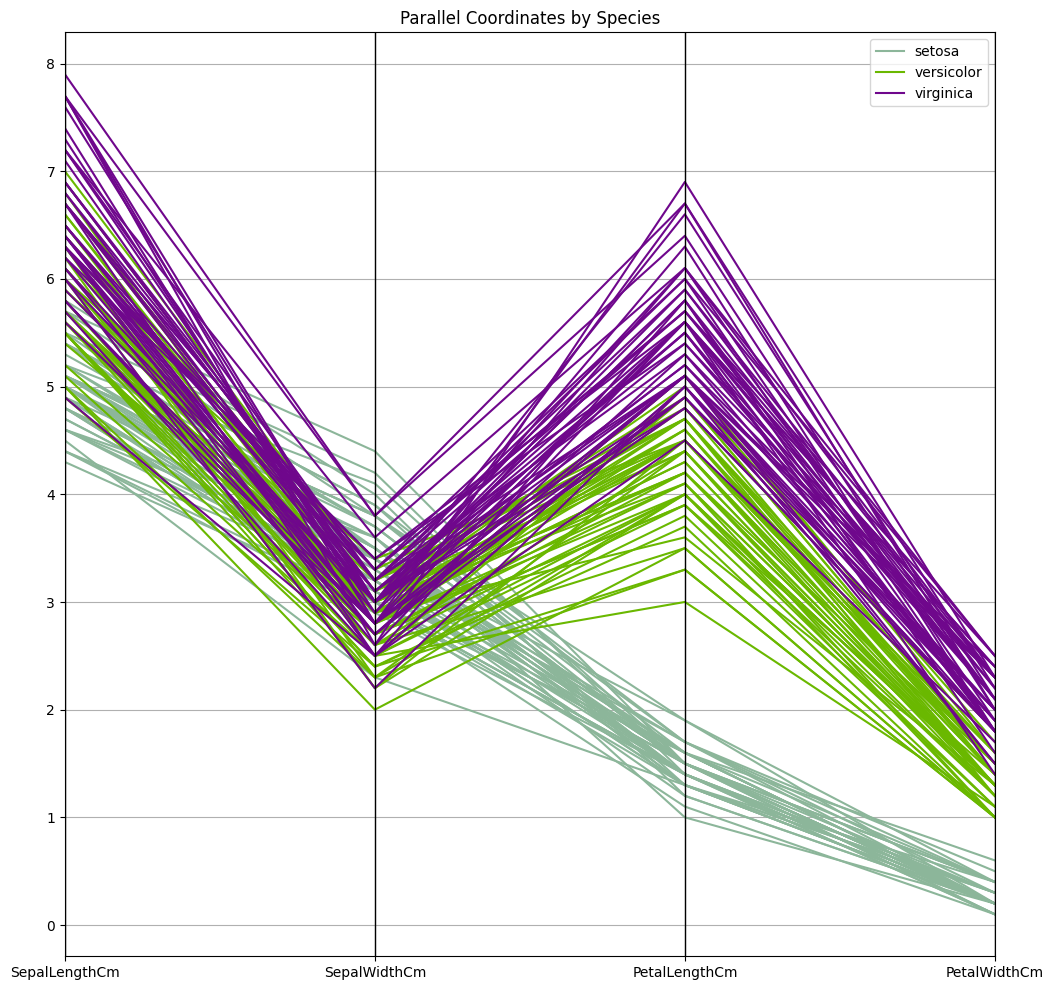

In [18]:
plt.figure(figsize=(12, 12))
parallel_coordinates(data_01, "Species")
plt.title('Parallel Coordinates by Species')
plt.show()

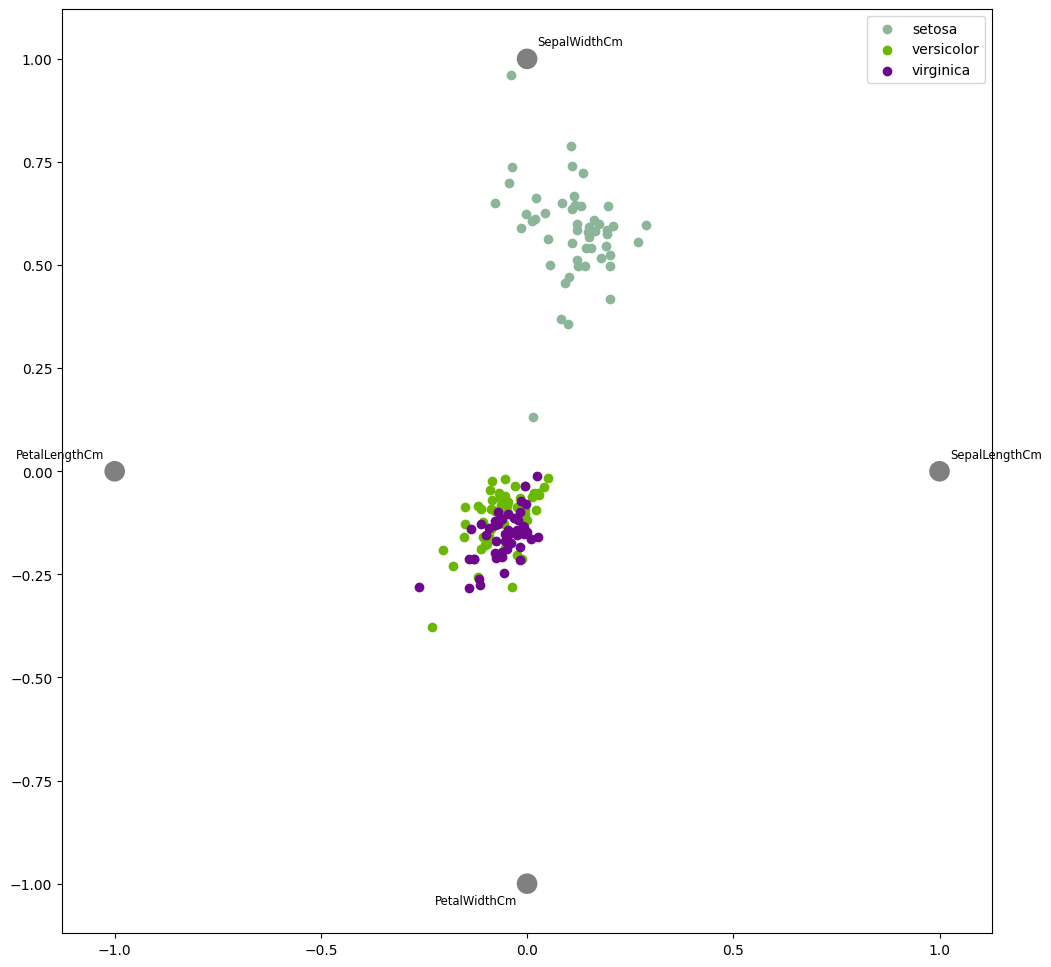

In [19]:
plt.figure(figsize=(12, 12))
radviz(data_01, "Species")
plt.show()

<Figure size 1200x1200 with 0 Axes>

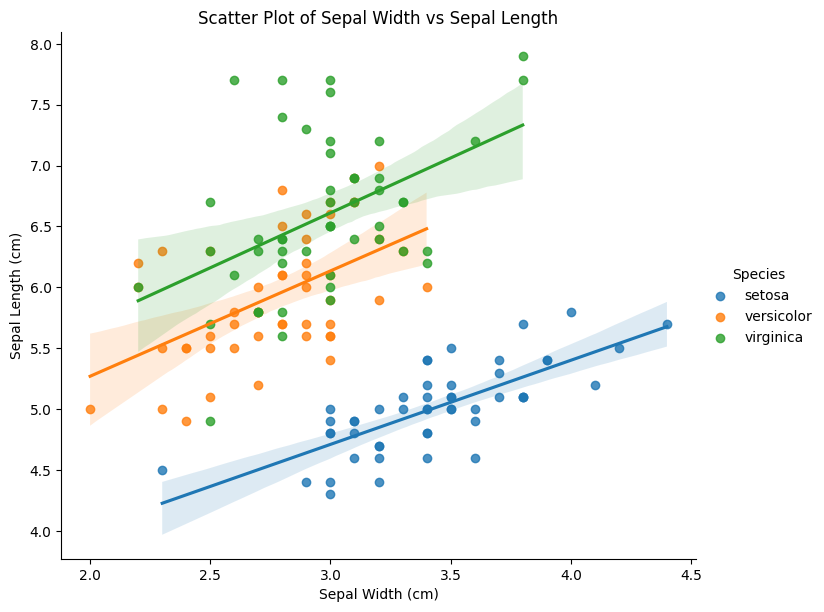

In [20]:
plt.figure(figsize=(12, 12))
sns.lmplot(x="SepalWidthCm", y="SepalLengthCm", hue="Species", data=data_01, height=6, aspect=1.2);
plt.title('Scatter Plot of Sepal Width vs Sepal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.show()

<Figure size 1200x1200 with 0 Axes>

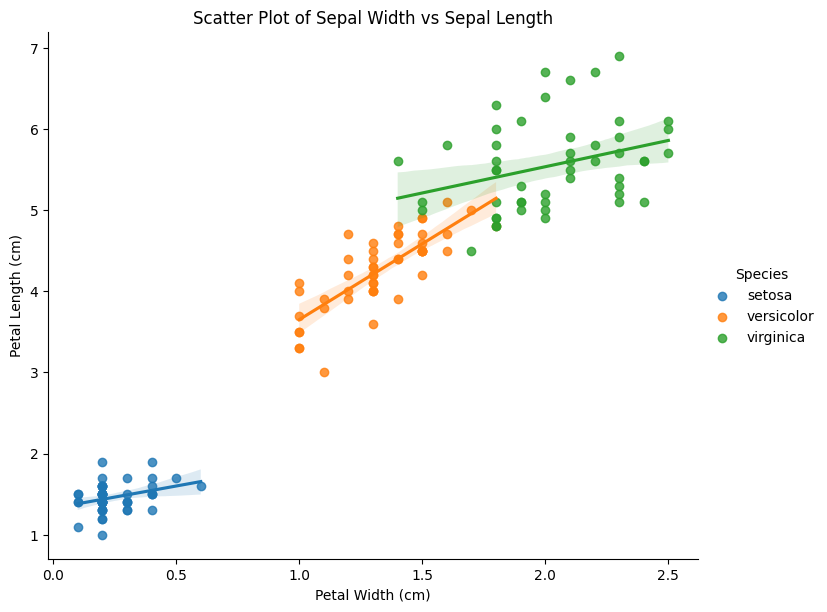

In [21]:
plt.figure(figsize=(12, 12))
sns.lmplot(x="PetalWidthCm", y="PetalLengthCm", hue="Species", data=data_01, height=6, aspect=1.2);
plt.title('Scatter Plot of Sepal Width vs Sepal Length')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [22]:
X = data_01.iloc[:,0:4]
Y = data_01.iloc[:,4]

In [23]:
Encoder = LabelEncoder()
Y = Encoder.fit_transform(Y)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.32, random_state = 101)

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Logastic Regression**

In [27]:
X_train_02 = X_train.copy()
X_train_02 = sm.add_constant(X_train_02)
X_test_02 = X_test.copy()
X_test_02 = sm.add_constant(X_test_02)

In [28]:
Logastics_01 = sm.MNLogit(Y_train, X_train_02)
result_01 = Logastics_01.fit()

         Current function value: 0.048701
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [29]:
print(result_01.summary())

                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  102
Model:                        MNLogit   Df Residuals:                       92
Method:                           MLE   Df Model:                            8
Date:                Sun, 04 Aug 2024   Pseudo R-squ.:                  0.9554
Time:                        07:42:29   Log-Likelihood:                -4.9675
converged:                      False   LL-Null:                       -111.49
Covariance Type:            nonrobust   LLR p-value:                 1.139e-41
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1354    4.6e+04      0.000      1.000   -9.01e+04    9.01e+04
x1            -0.5133    1.1e+05  -4.67e-06      1.000   -2.16e+05    2.16e+05
x2           -11.6540   5.68e+04     -0.000      1.0

In [30]:
y_prediction_probababilty = result_01.predict(X_test_02)
print(y_prediction_probababilty)

[[1.00000000e+00 3.85760190e-27 4.07492332e-50]
 [1.00000000e+00 1.39500409e-22 1.92551749e-43]
 [1.00000000e+00 9.90371943e-15 4.06780464e-32]
 [6.13515606e-22 9.15597522e-02 9.08440248e-01]
 [1.68523458e-11 9.99789577e-01 2.10423201e-04]
 [5.09428003e-23 3.85768004e-02 9.61423200e-01]
 [2.07713033e-23 6.70683743e-01 3.29316257e-01]
 [3.37004710e-18 9.99159836e-01 8.40164364e-04]
 [3.56303894e-28 1.11879966e-03 9.98881200e-01]
 [1.00000000e+00 7.77098216e-13 3.58934130e-32]
 [1.02038500e-23 2.12824018e-03 9.97871760e-01]
 [1.00000000e+00 3.99812317e-26 3.28259965e-49]
 [1.00000000e+00 1.13355215e-15 1.33462208e-34]
 [2.90328853e-37 2.77998593e-07 9.99999722e-01]
 [8.16513703e-19 2.03765814e-01 7.96234186e-01]
 [2.06902640e-12 9.99954556e-01 4.54436309e-05]
 [1.97930141e-10 9.99986787e-01 1.32125724e-05]
 [4.32810640e-12 9.99957945e-01 4.20551384e-05]
 [1.00000000e+00 1.44235508e-15 1.42240007e-35]
 [4.98792401e-24 2.29327389e-01 7.70672611e-01]
 [1.68890938e-14 9.99995199e-01 4.801186

In [31]:
Y_pred_01 = np.argmax(y_prediction_probababilty, axis=1)

In [32]:
print(f'Accuracy: {accuracy_score(Y_test, Y_pred_01)}')

Accuracy: 1.0


**K – Nearest Neighbour (KNN)**

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)

In [36]:
print("Classification Report:")
print(classification_report(Y_test, y_pred, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.95      1.00      0.98        21
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



In [37]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

Confusion Matrix:
[[14  0  0]
 [ 0 21  0]
 [ 0  1 12]]


In [38]:
accuracy = knn.score(X_test, Y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


**Support Vector Machine**

In [39]:
SMV = SVC(kernel='linear')

In [40]:
SMV.fit(X_train, Y_train)

SVC(kernel='linear')

In [41]:
Y_pred_02 = SMV.predict(X_test)

In [42]:
print("Accuracy:", accuracy_score(Y_test, Y_pred_02))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_02))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_02))

Accuracy: 1.0

Confusion Matrix:
[[14  0  0]
 [ 0 21  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        13

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



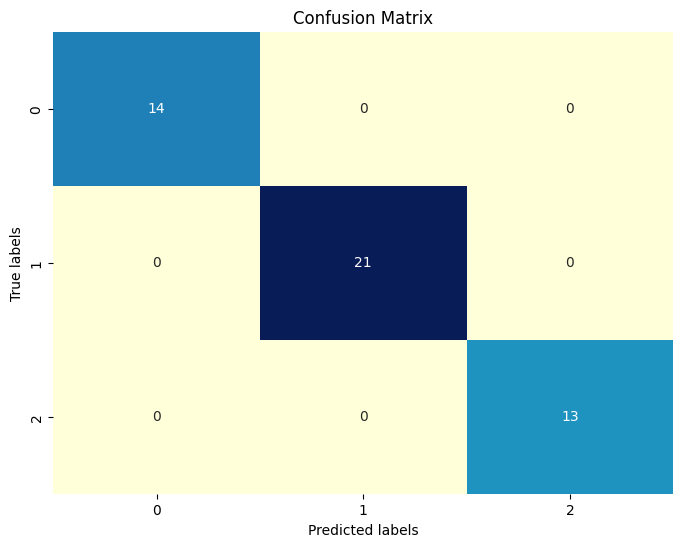

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred_02), annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

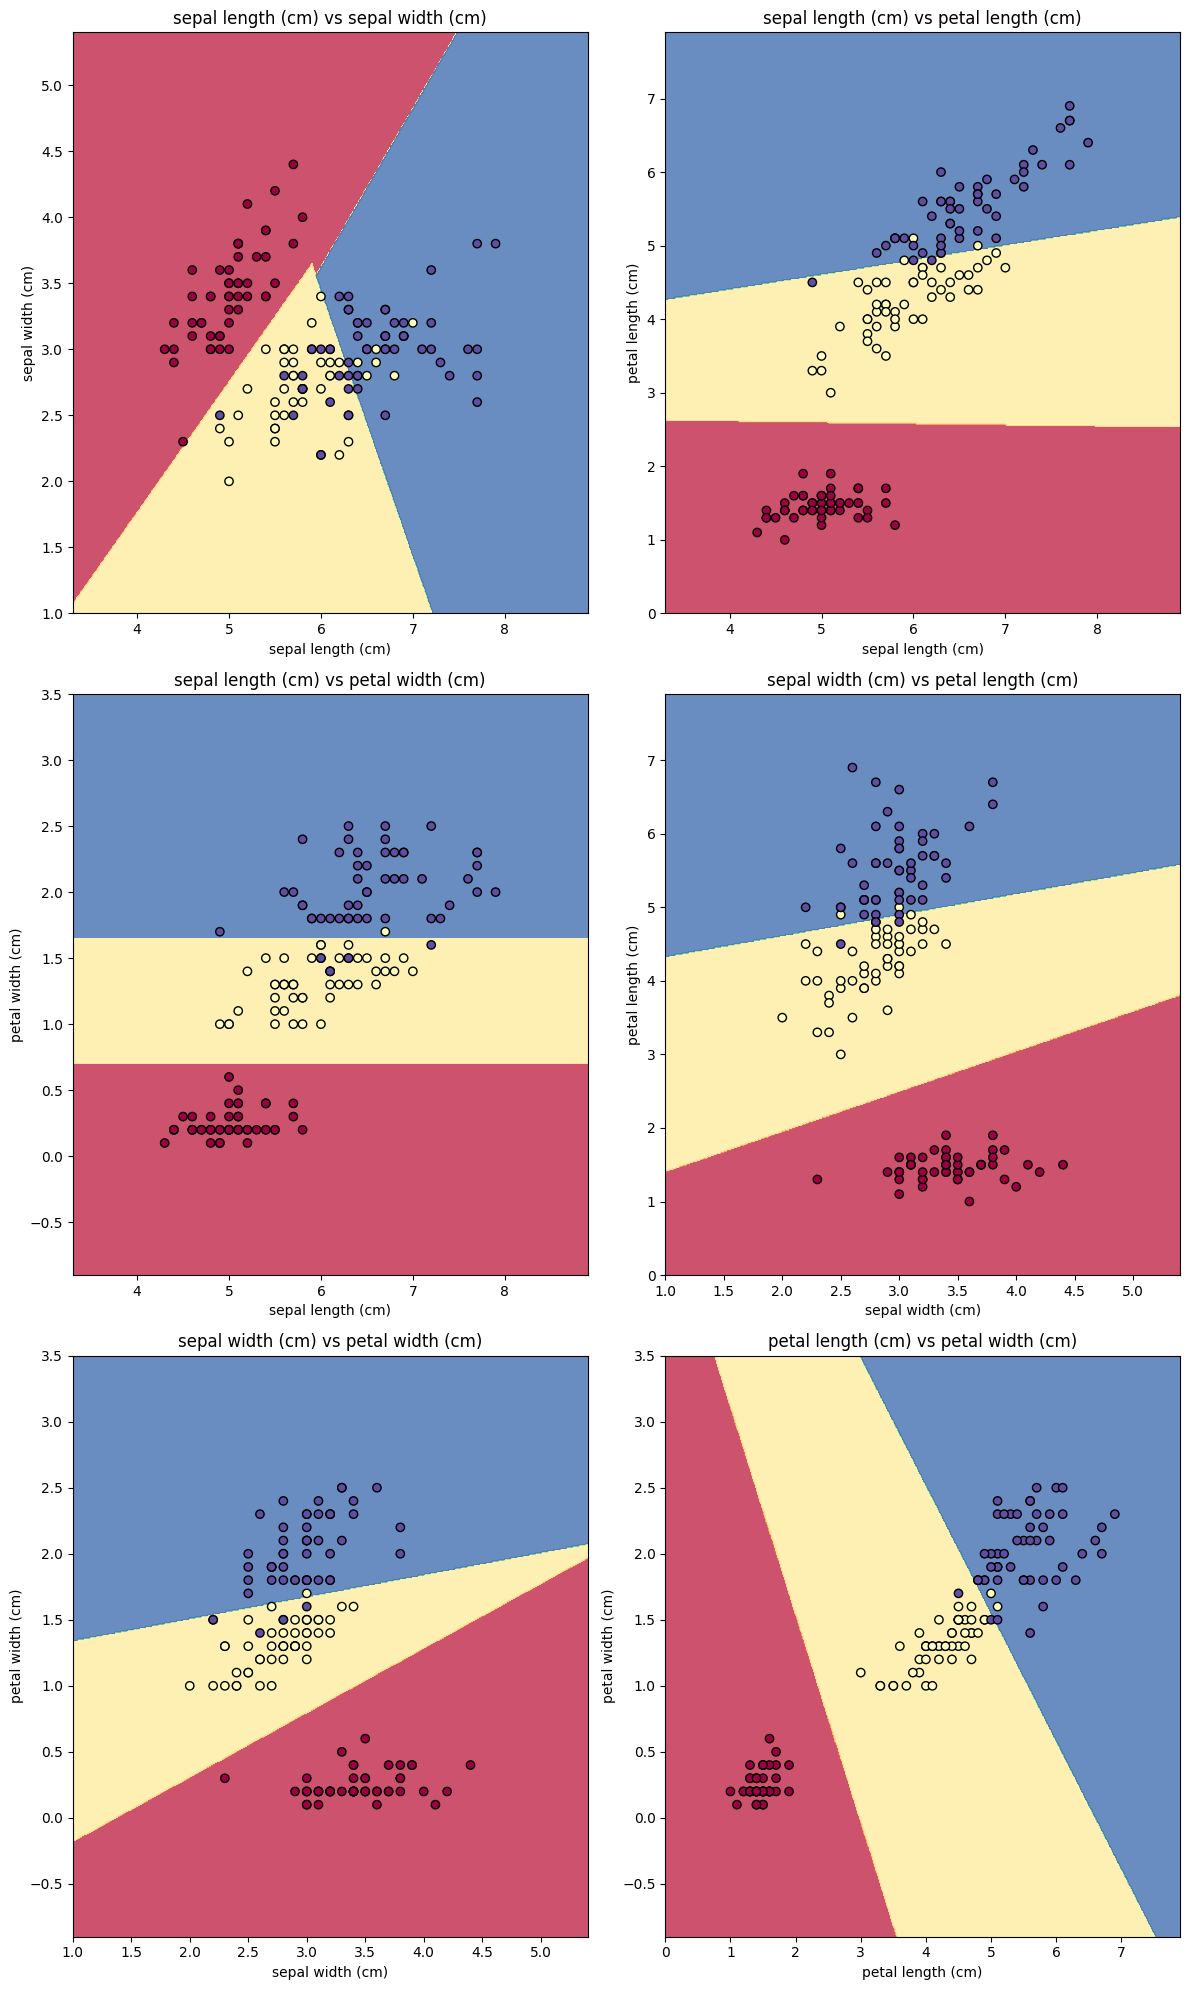

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from itertools import combinations

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

feature_pairs = list(combinations(range(X.shape[1]), 2))


fig, axs = plt.subplots(len(feature_pairs) // 2, 2, figsize=(12, 20))

for i, pair in enumerate(feature_pairs):
    X_pair = X[:, pair]

    clf = svm.SVC(kernel='linear')
    clf.fit(X_pair, y)

    xx, yy = np.meshgrid(np.linspace(X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1, 500),
                         np.linspace(X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axs[i // 2, i % 2]
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    ax.scatter(X_pair[:, 0], X_pair[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    ax.set_xlabel(feature_names[pair[0]])
    ax.set_ylabel(feature_names[pair[1]])
    ax.set_title(f'{feature_names[pair[0]]} vs {feature_names[pair[1]]}')

plt.tight_layout()
plt.show()

**Gaussian Naive Bayes**

In [45]:
gnb_classifier = GaussianNB()

In [46]:
gnb_classifier.fit(X_train, Y_train)

GaussianNB()

In [47]:
Y_pred_03 = gnb_classifier.predict(X_test)

In [48]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_03))

Accuracy: 0.9583333333333334


In [49]:
confusion_matrix_03 = metrics.confusion_matrix(Y_test, Y_pred_03)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
<function confusion_matrix at 0x7b65fef1b400>


In [50]:
class_report = metrics.classification_report(Y_test, Y_pred_03)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      0.95      0.95        21
           2       0.92      0.92      0.92        13

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



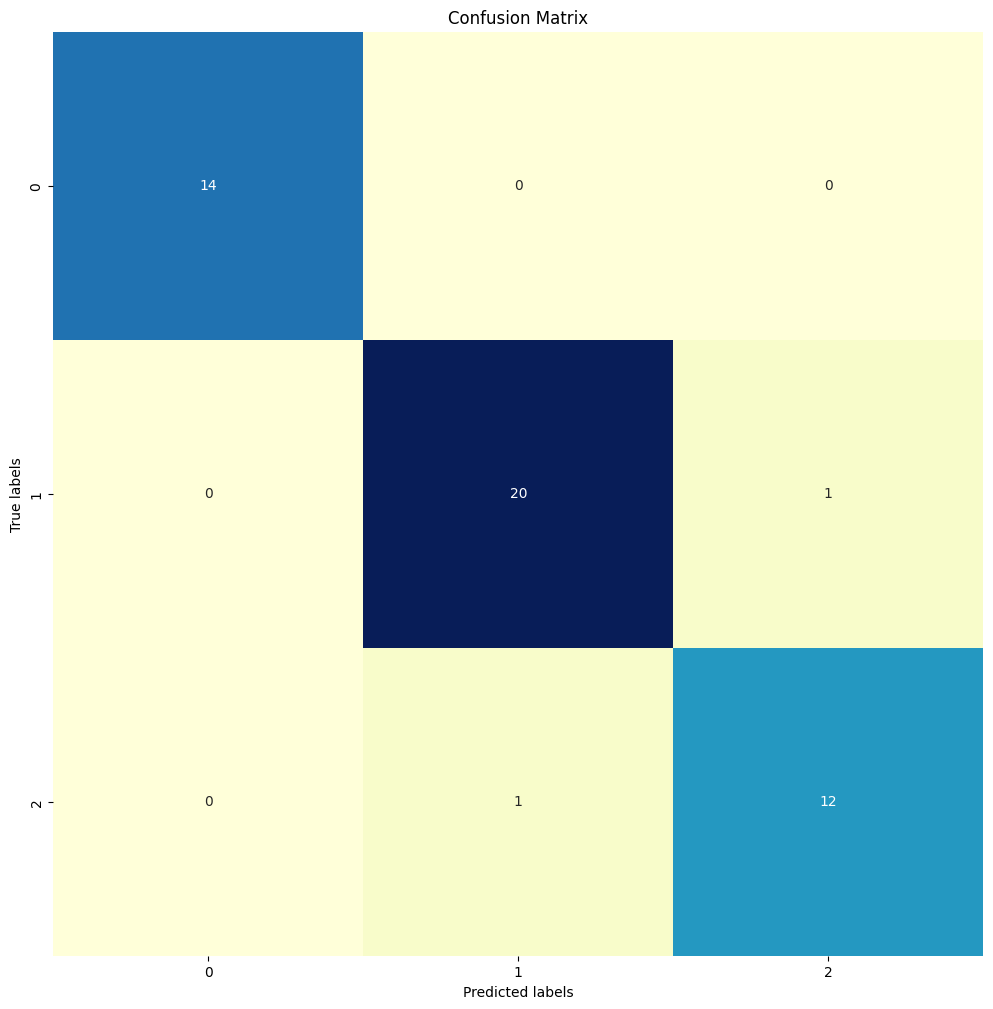

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix_03, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Bernoulli Naive Bayes**

In [52]:
bnb_classifier = BernoulliNB()

In [53]:
bnb_classifier.fit(X_train, Y_train)

BernoulliNB()

In [54]:
Y_pred_07 = bnb_classifier.predict(X_test)

In [55]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_07))

Accuracy: 0.7916666666666666


In [56]:
confusion_matrix_07 = metrics.confusion_matrix(Y_test, Y_pred_07)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
<function confusion_matrix at 0x7b65fef1b400>


In [57]:
class_report = metrics.classification_report(Y_test, Y_pred_07)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.92      0.57      0.71        21
           2       0.60      0.92      0.73        13

    accuracy                           0.79        48
   macro avg       0.82      0.83      0.80        48
weighted avg       0.84      0.79      0.79        48



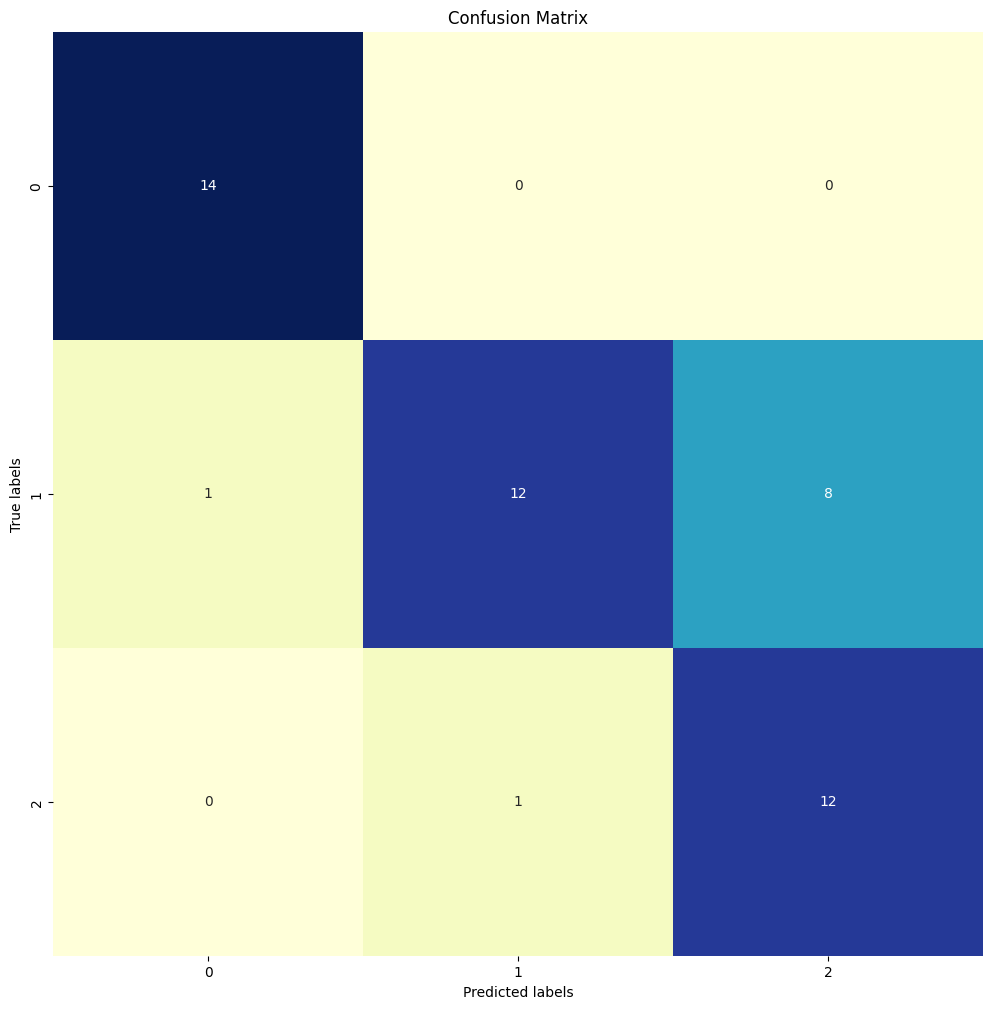

In [58]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix_07, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Decision Tree**

In [59]:
decision = DecisionTreeClassifier(random_state=42)

In [60]:
decision.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
Y_pred_04 = decision.predict(X_test)

In [62]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_04))

Accuracy: 0.9583333333333334


In [63]:
confusion_matrix_04 = metrics.confusion_matrix(Y_test, Y_pred_04)
print("Confusion Matrix:")
print(confusion_matrix_04)

Confusion Matrix:
[[14  0  0]
 [ 0 20  1]
 [ 0  1 12]]


In [64]:
class_report = metrics.classification_report(Y_test, Y_pred_04)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      0.95      0.95        21
           2       0.92      0.92      0.92        13

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



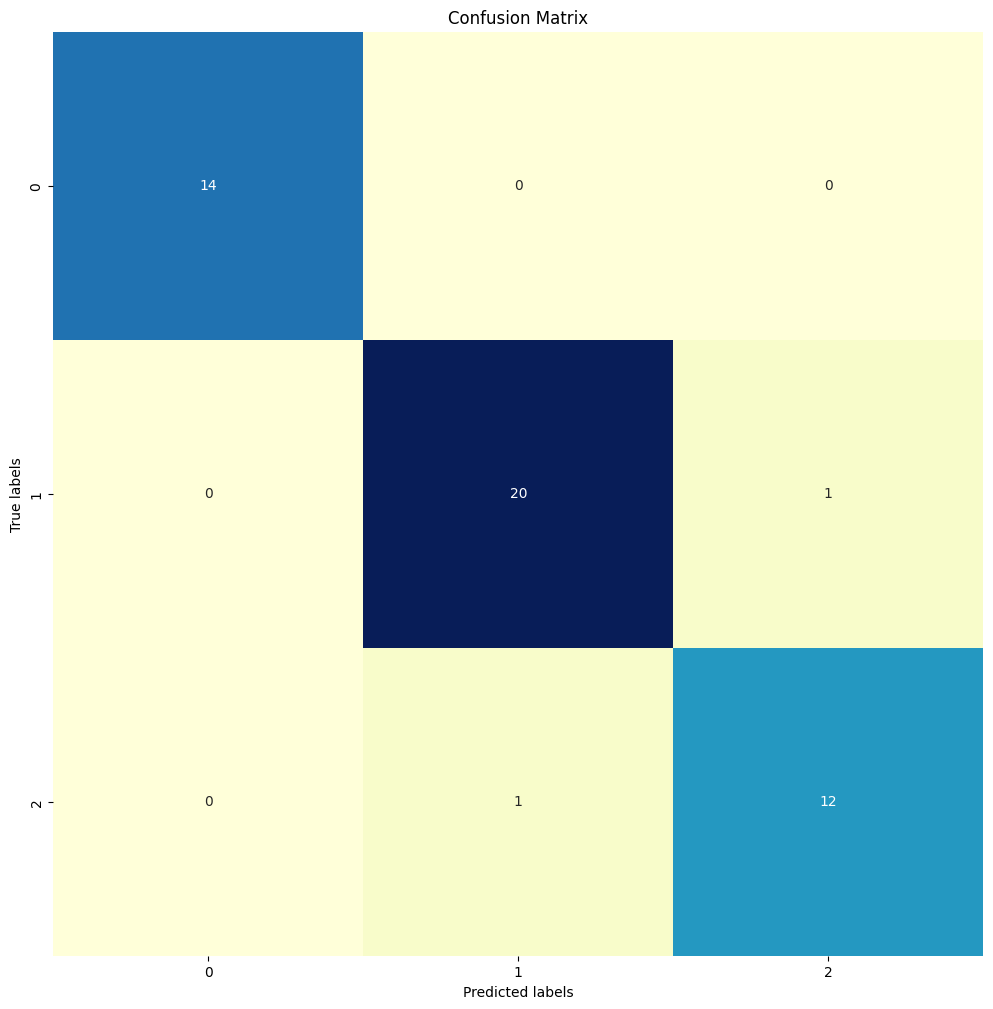

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix_04, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

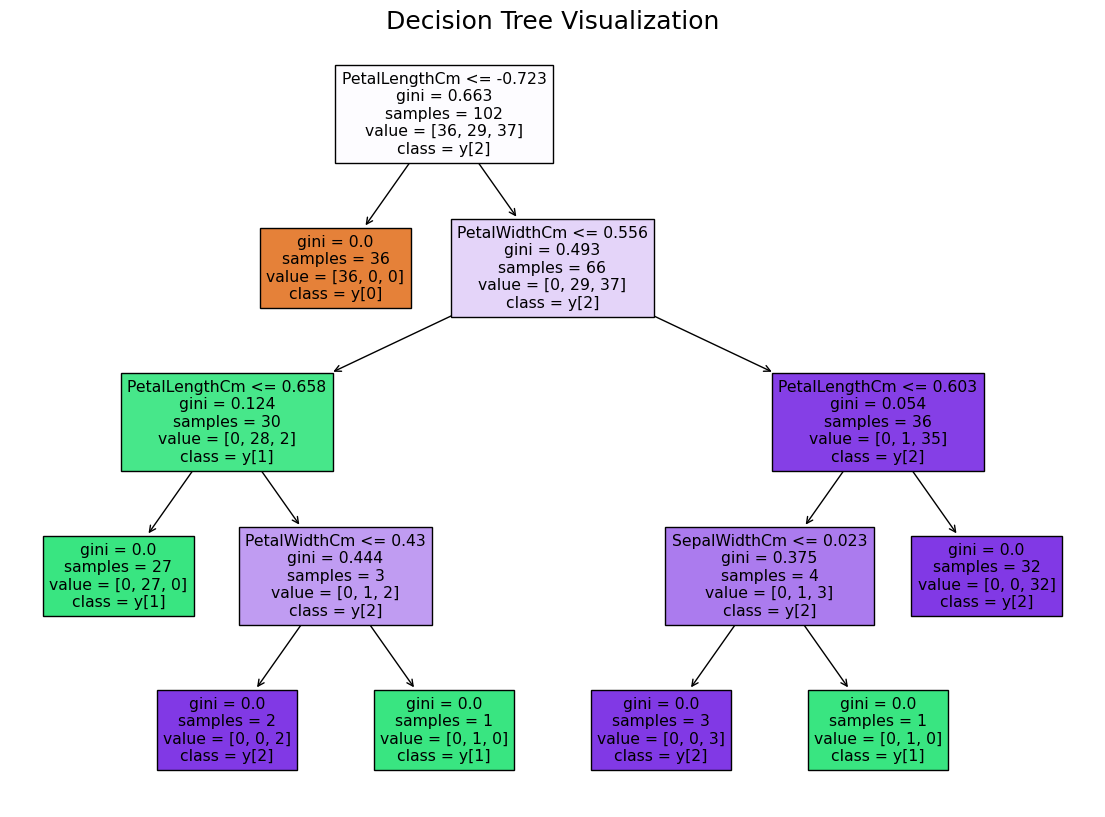

In [66]:
plt.figure(figsize=(14, 10))
plot_tree(decision, filled=True, feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], class_names=True)
plt.title("Decision Tree Visualization", fontsize=18)
plt.show()

**Random Forest**

In [67]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [68]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

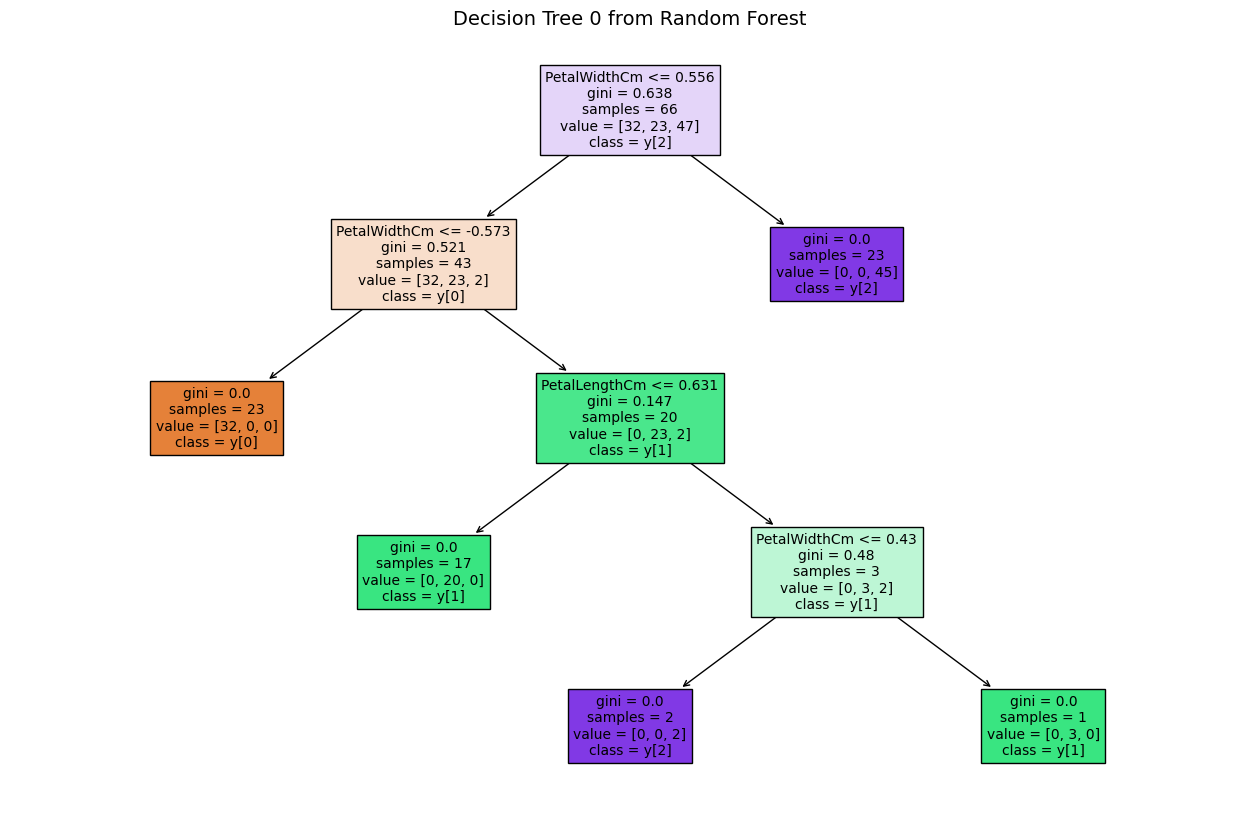

In [69]:
tree_index = 0
chosen_tree = rf_classifier.estimators_[tree_index]

plt.figure(figsize=(16, 10))
plot_tree(chosen_tree, filled=True, feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], class_names=True, fontsize=10)
plt.title(f"Decision Tree {tree_index} from Random Forest", fontsize=14)
plt.show()

In [70]:
y_pred_05 = rf_classifier.predict(X_test)

In [71]:
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred_05))

Accuracy: 0.9791666666666666


In [72]:
confusion_matrix_05 = metrics.confusion_matrix(Y_test, y_pred_05)
print("Confusion Matrix:")
print(confusion_matrix_05)

Confusion Matrix:
[[14  0  0]
 [ 0 20  1]
 [ 0  0 13]]


In [73]:
class_report = metrics.classification_report(Y_test, y_pred_05)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.96        13

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



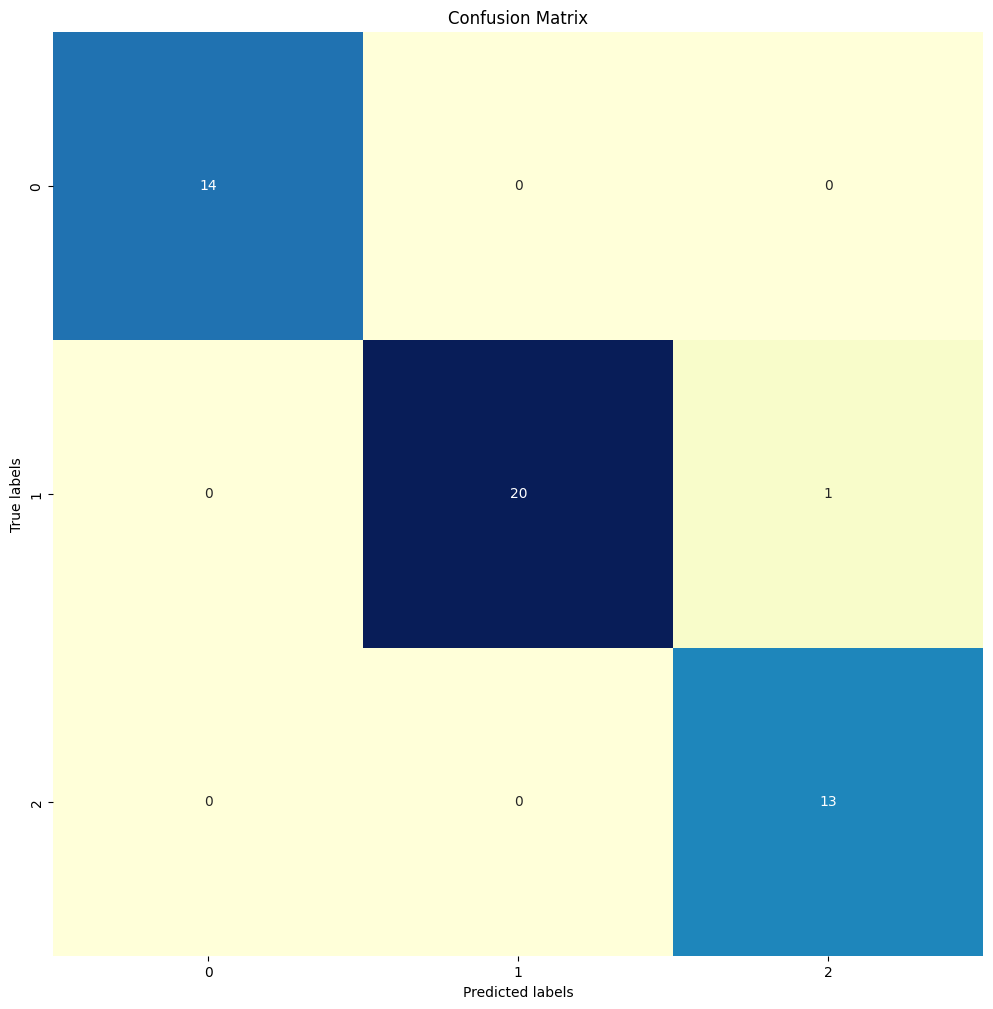

In [74]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix_05, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [75]:
feature_importances = rf_classifier.feature_importances_
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
indices = np.argsort(feature_importances)[::-1]

<ipython-input-76-ecc4c7f8988f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




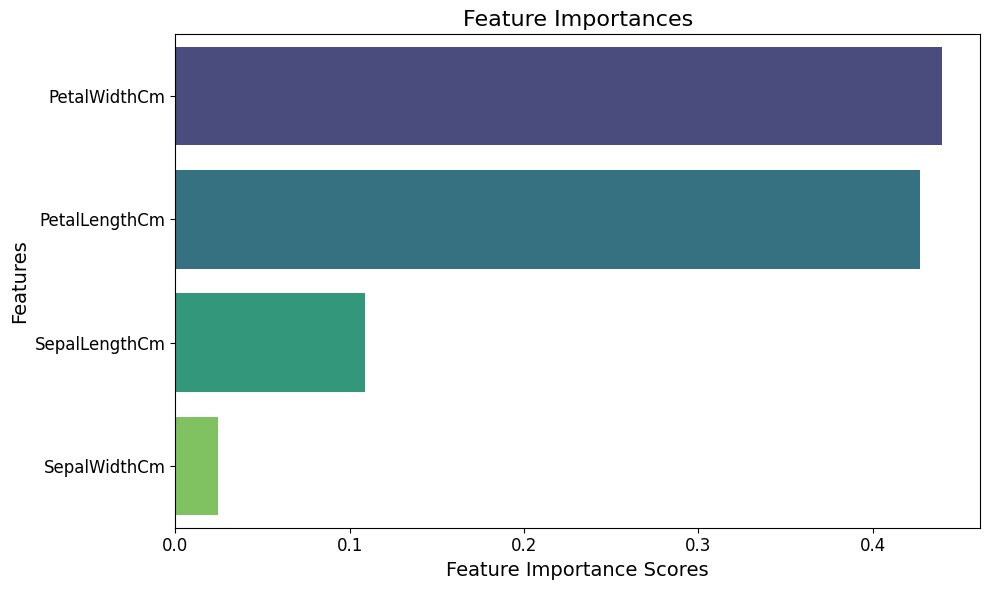

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=np.array(features)[indices], palette='viridis')
plt.xlabel('Feature Importance Scores', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [77]:
print("Session End")

Session End
